In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
A = pd.read_csv("D:/Work/Gaurav/ETLHIVE/Data sets/Cars93.csv")

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
A["Car_name"] = A.Make

In [5]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,Car_name
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,BMW 535i


In [6]:
B = A[["Price","MPG.city"]]

In [7]:
K = range(1,10,1)
wcss = []
for i in range (1,10,1):
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=i)
    model = km.fit(B)
    wcss.append(round(model.inertia_,2))

Text(0.5, 1.0, 'Elbow_Curve')

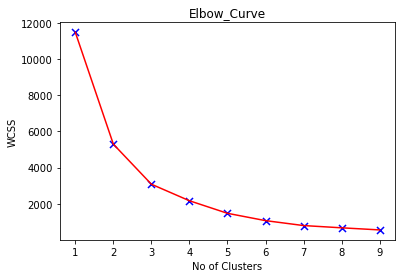

In [8]:
import matplotlib.pyplot as plt
plt.scatter(K,wcss,c="blue",s=50,marker="x")
plt.plot(K,wcss,c="red")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow_Curve")

In [9]:
km = KMeans(n_clusters=3)
model = km.fit(B)
model.labels_
B["Cluster"] = model.labels_

In [10]:
B.head()

,Price,MPG.city,Cluster
0,15.9,25,1
1,33.9,18,2
2,29.1,20,2
3,37.7,19,2
4,30.0,22,2


Text(0.5, 1.0, 'Price vs Mileage')

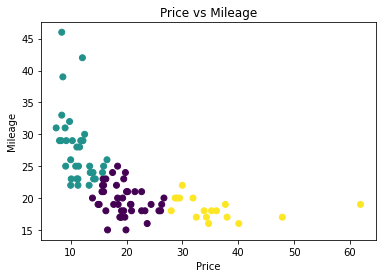

In [12]:
plt.scatter(B.Price,B["MPG.city"],c=B.Cluster)
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.title("Price vs Mileage")

In [13]:
B["Car_name"] = A.Car_name

In [14]:
B.head()

,Price,MPG.city,Cluster,Car_name
0,15.9,25,1,Acura Integra
1,33.9,18,2,Acura Legend
2,29.1,20,2,Audi 90
3,37.7,19,2,Audi 100
4,30.0,22,2,BMW 535i


In [21]:
Q = input("Enter the car name to see similer cars : ")
cno = B[B.Car_name == Q][["Cluster"]].values[0][0]
print ("Similer cars : ")
for i in list (B[(B.Cluster == cno) & (B.Car_name != Q)][["Car_name"]].values):
    print(i[0])

Enter the car name to see similer cars : Acura Integra
Similer cars : 
Chevrolet Cavalier
Chevrolet Corsica
Dodge Colt
Dodge Shadow
Dodge Spirit
Eagle Summit
Ford Festiva
Ford Escort
Ford Tempo
Ford Probe
Geo Metro
Geo Storm
Honda Civic
Hyundai Excel
Hyundai Elantra
Hyundai Scoupe
Mazda 323
Mazda Protege
Mazda 626
Mercury Capri
Mitsubishi Mirage
Nissan Sentra
Nissan Altima
Oldsmobile Achieva
Plymouth Laser
Pontiac LeMans
Pontiac Sunbird
Saturn SL
Subaru Justy
Subaru Loyale
Suzuki Swift
Toyota Tercel
Volkswagen Fox
